In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, pairwise_distances_argmin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

import seaborn as sns

# Get data

In [2]:
#https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
data_array = pd.read_csv('smoke_detection_iot.csv',delimiter=',')

In [3]:
data_array

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   12306        18520        939.735   0.00   0.00   0.00   
1            400   12345        18651        939.744   0.00   0.00   0.00   
2            400   12374        18764        939.738   0.00   0.00   0.00   
3            400   12390        18849        939.736   0.00   0.00   0.00   
4            400   12403        18921        939.744   0.00   0.00   0.00   
...          ...     ...          ...            ...    ...    ...    ...   
62625        400   13723        20569        936.670   0.63   0.65   4.32   
62626        400   13731        20588        936.678   0.61   0.63   4.18   
62627        400   13725        20582        936.687   0.57   0.60   3.95   
62628        400   13712        20566        936.680   0.57   0.59   3.92   
62629        400   13696        20543        936.676   0.57   0.59   3.90   

       NC1.0  NC2.5   CNT  Fire Alarm  
0      0.000  0.000     0           0  
1      0.000  0.000     1           0  
2      0.000  0.000     2           0  
3      0.000  0.000     3           0  
4      0.000  0.000     4           0  
...      ...    ...   ...         ...  
62625  0.673  0.015  5739           0  
62626  0.652  0.015  5740           0  
62627  0.617  0.014  5741           0  
62628  0.611  0.014  5742           0  
62629  0.607  0.014  5743           0  

[62630 rows x 16 columns]

In [4]:
del data_array["Unnamed: 0"]
data_array

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5   CNT  \
0            18520        939.735   0.00   0.00   0.00  0.000  0.000     0   
1            18651        939.744   0.00   0.00   0.00  0.000  0.000     1   
2            18764        939.738   0.00   0.00   0.00  0.000  0.000     2   
3            18849        939.736   0.00   0.00   0.00  0.000  0.000     3   
4            18921        939.744   0.00   0.00   0.00  0.000  0.000     4   
...            ...            ...    ...    ...    ...    ...    ...   ...   
62625        20569        936.670   0.63   0.65   4.32  0.673  0.015  5739   
62626        20588        936.678   0.61   0.63   4.18  0.652  0.015  5740   
62627        20582        936.687   0.57   0.60   3.95  0.617  0.014  5741   
62628        20566        936.680   0.57   0.59   3.92  0.611  0.014  5742   
62629        20543        936.676   0.57   0.59   3.90  0.607  0.014  5743   

       Fire Alarm  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
62625           0  
62626           0  
62627           0  
62628           0  
62629           0  

[62630 rows x 15 columns]

In [5]:
data_without_y = data_array.copy()
del data_without_y["Fire Alarm"]

# Scale

In [6]:
variables=["UTC", "Temperature[C]", "Humidity[%]", "TVOC[ppb]", "eCO2[ppm]", "Raw H2", "Raw Ethanol", "Pressure[hPa]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", "CNT"]
scaler = StandardScaler()
data_without_y[variables] = scaler.fit_transform(data_without_y[variables])
data_without_y

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
0     -0.533948        0.280622     0.994947  -0.248614  -0.141679 -2.335935   
1     -0.533939        0.281666     0.917115  -0.248614  -0.141679 -2.192796   
2     -0.533930        0.282641     0.837028  -0.248614  -0.141679 -2.086359   
3     -0.533921        0.283686     0.760324  -0.248614  -0.141679 -2.027636   
4     -0.533912        0.284730     0.693773  -0.248614  -0.141679 -1.979923   
...         ...             ...          ...        ...        ...       ...   
62625  3.072508        0.171843    -3.694123  -0.168604  -0.141679  2.864787   
62626  3.072517        0.186816    -3.685100  -0.170269  -0.141679  2.894149   
62627  3.072526        0.201719    -3.688484  -0.168348  -0.141679  2.872128   
62628  3.072535        0.216761    -3.665924  -0.166940  -0.141679  2.824415   
62629  3.072544        0.231804    -3.611780  -0.166300  -0.141679  2.765691   

       Raw Ethanol  Pressure[hPa]     PM1.0     PM2.5     NC0.5     NC1.0  \
0        -2.025006       0.831761 -0.109043 -0.093340 -0.115215 -0.091924   
1        -1.810079       0.838521 -0.109043 -0.093340 -0.115215 -0.091924   
2        -1.624683       0.834014 -0.109043 -0.093340 -0.115215 -0.091924   
3        -1.485227       0.832512 -0.109043 -0.093340 -0.115215 -0.091924   
4        -1.367099       0.838521 -0.109043 -0.093340 -0.115215 -0.091924   
...            ...            ...       ...       ...       ...       ...   
62625     1.336720      -1.470443 -0.108360 -0.093012 -0.114202 -0.091620   
62626     1.367893      -1.464434 -0.108382 -0.093022 -0.114235 -0.091630   
62627     1.358049      -1.457674 -0.108425 -0.093037 -0.114289 -0.091646   
62628     1.331798      -1.462932 -0.108425 -0.093042 -0.114296 -0.091648   
62629     1.294063      -1.465936 -0.108425 -0.093042 -0.114301 -0.091650   

          NC2.5       CNT  
0     -0.073889 -1.383476  
1     -0.073889 -1.383344  
2     -0.073889 -1.383212  
3     -0.073889 -1.383081  
4     -0.073889 -1.382949  
...         ...       ...  
62625 -0.073875 -0.628127  
62626 -0.073875 -0.627995  
62627 -0.073876 -0.627863  
62628 -0.073876 -0.627732  
62629 -0.073876 -0.627600  

[62630 rows x 14 columns]

# Principal component analysis (PCA)

In [7]:
pca = PCA()
X_pca = pca.fit_transform(data_without_y)

In [8]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

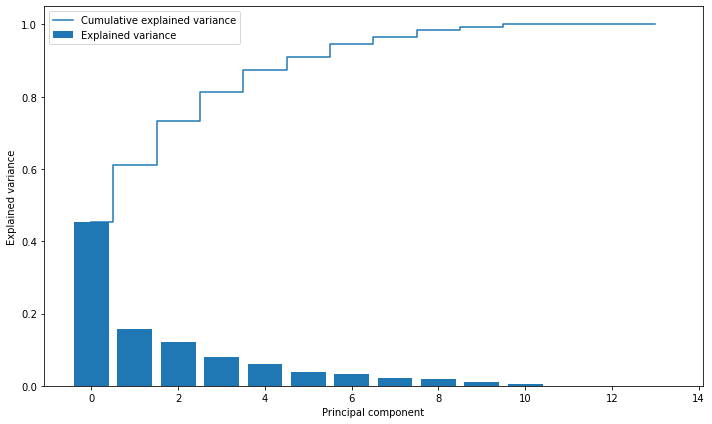

In [9]:
plt.figure(figsize=(10,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

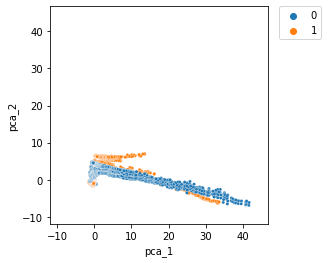

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_without_y)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': data_array["Fire Alarm"]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# tSNE

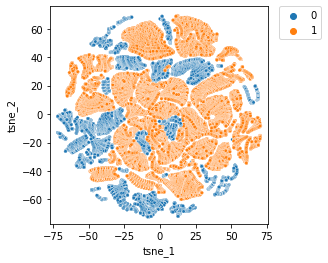

In [11]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data_without_y)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': data_array["Fire Alarm"]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Get image

In [12]:
img = Image.open(r'IMG1.jpg')

In [13]:
img = np.array(img, dtype=np.float64) / 255

In [14]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

# Color Quantization

In [15]:
def image_prediction(n_colors):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    return kmeans, labels, codebook_random, labels_random

In [16]:
i=image_prediction(64)
kmeans = i[0]
labels = i[1]
codebook_random = i[2]
labels_random = i[3]

In [17]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

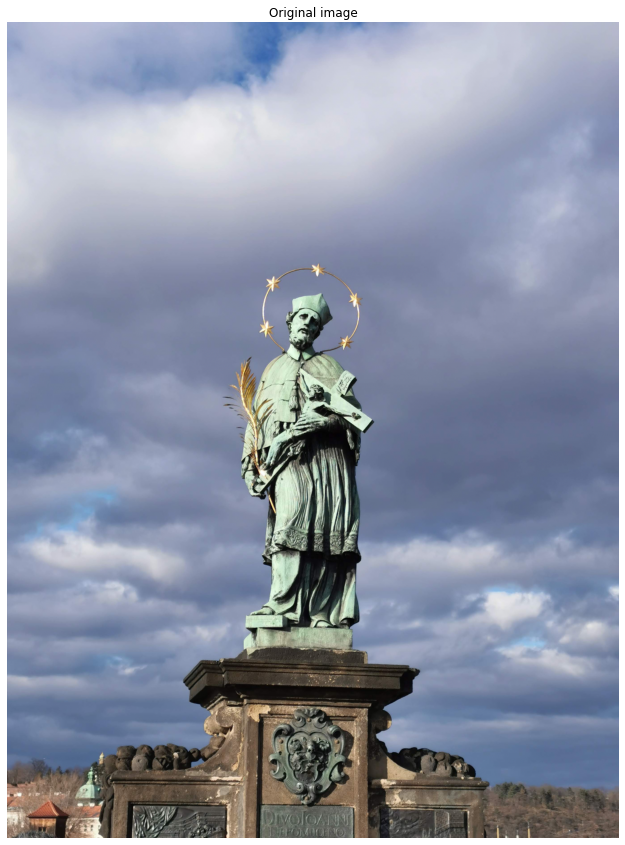

In [18]:
plt.figure(figsize=(15,15))
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

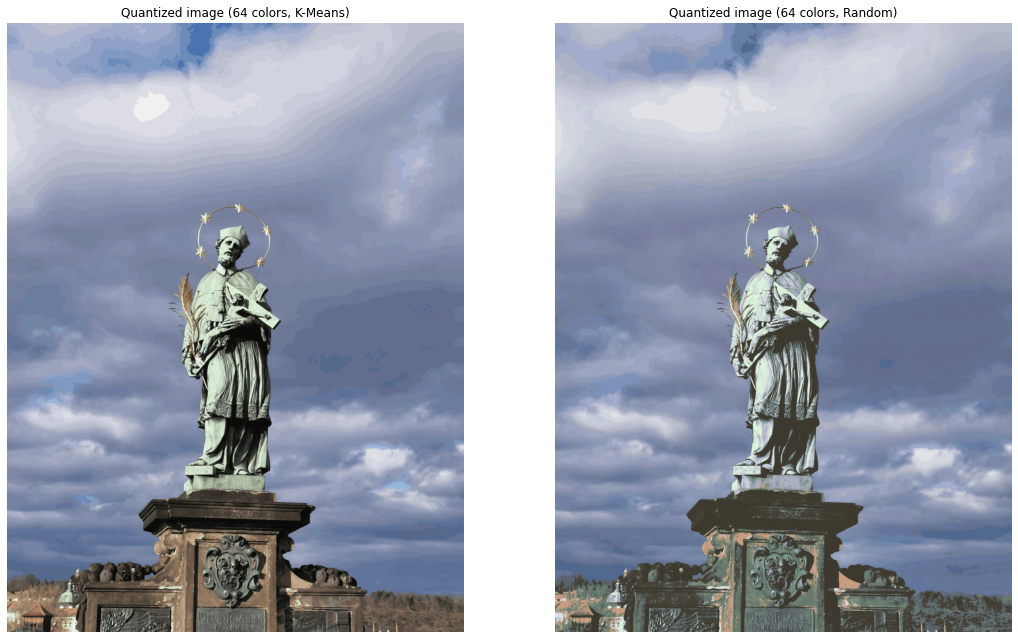

In [19]:
fig, ax = plt.subplots(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title(f"Quantized image (64 colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.subplot(1,2,2)
plt.axis("off")
plt.title(f"Quantized image (64 colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

In [20]:
i=image_prediction(32)
kmeans = i[0]
labels = i[1]
codebook_random = i[2]
labels_random = i[3]

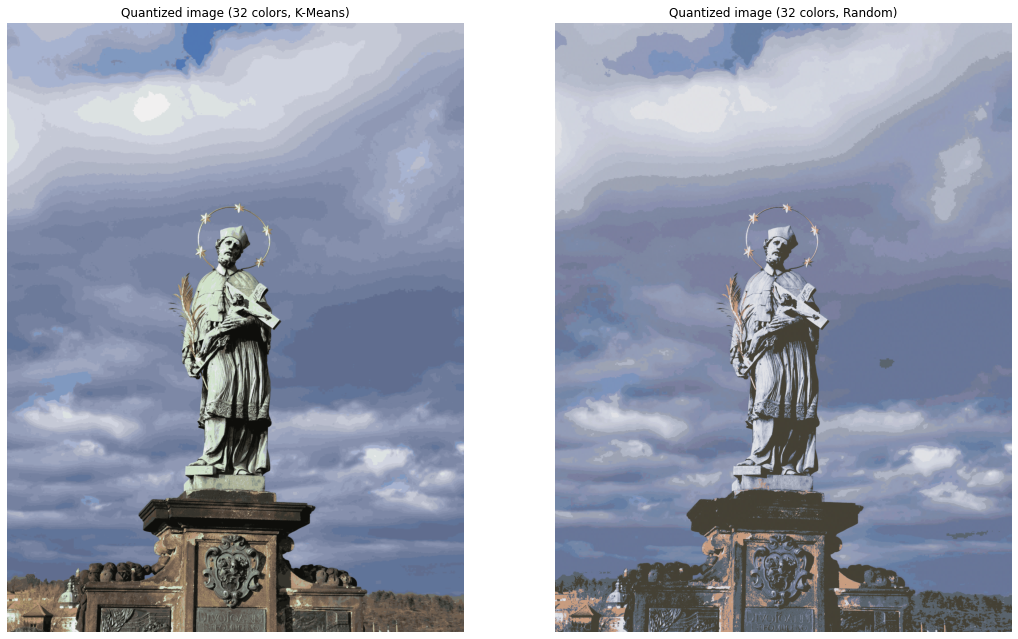

In [21]:
fig, ax = plt.subplots(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title(f"Quantized image (32 colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.subplot(1,2,2)
plt.axis("off")
plt.title(f"Quantized image (32 colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

In [22]:
i=image_prediction(16)
kmeans = i[0]
labels = i[1]
codebook_random = i[2]
labels_random = i[3]

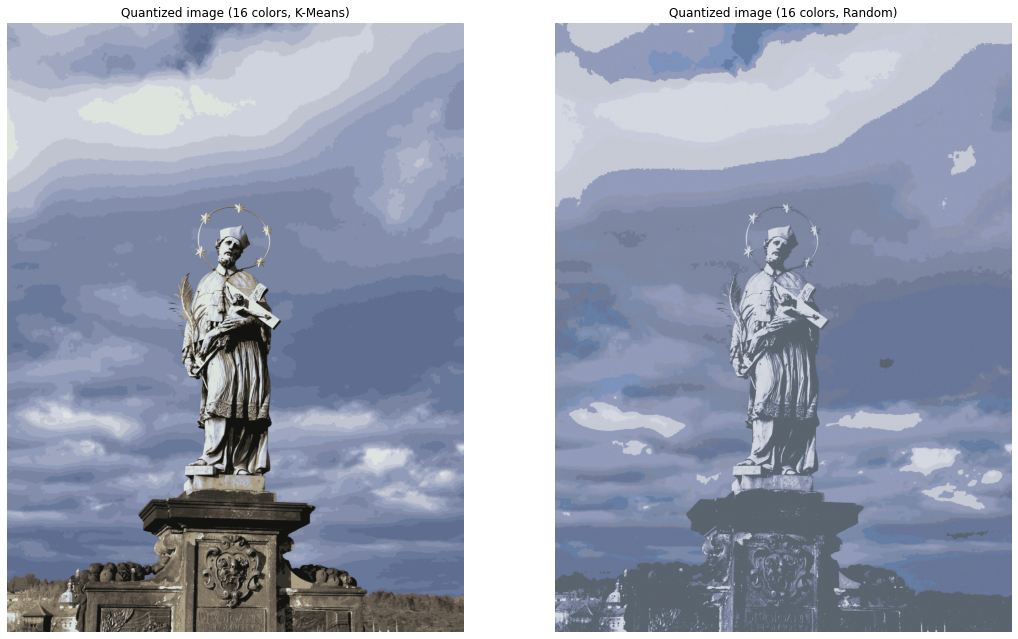

In [23]:
fig, ax = plt.subplots(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title(f"Quantized image (16 colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.subplot(1,2,2)
plt.axis("off")
plt.title(f"Quantized image (16 colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

In [24]:
i=image_prediction(8)
kmeans = i[0]
labels = i[1]
codebook_random = i[2]
labels_random = i[3]

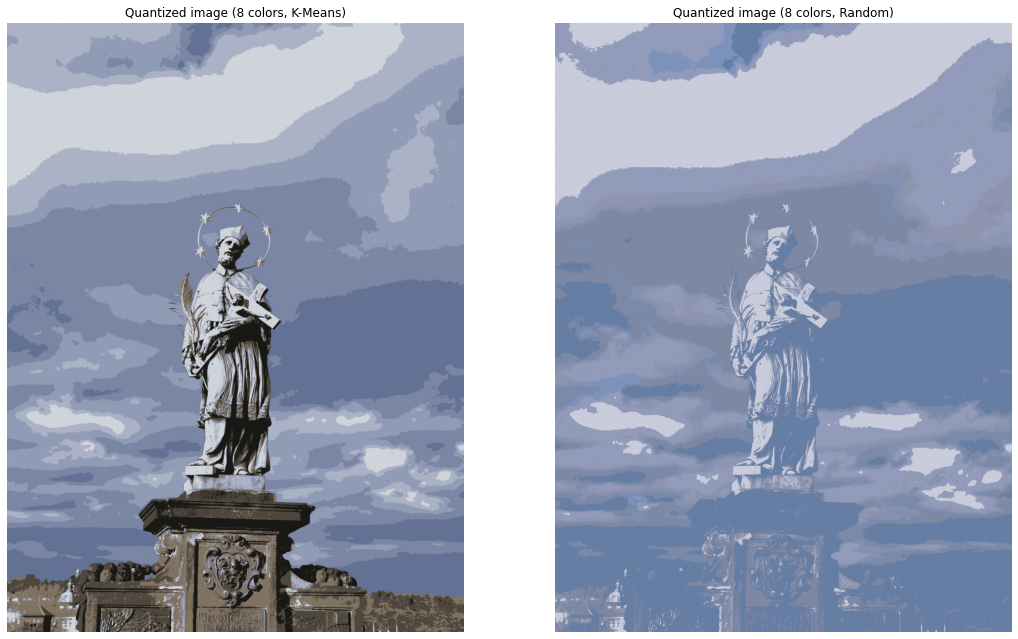

In [25]:
fig, ax = plt.subplots(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title(f"Quantized image (8 colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.subplot(1,2,2)
plt.axis("off")
plt.title(f"Quantized image (8 colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

# Get text data

In [26]:
#https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?select=twitter_training.csv
data_array = pd.read_csv('twitter_training.csv',delimiter=',', header=None)

In [27]:
data_array

0            1         2  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                       3  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [28]:
del data_array[0]
del data_array[1]
data_array

2                                                  3
0      Positive  im getting on borderlands and i will murder yo...
1      Positive  I am coming to the borders and I will kill you...
2      Positive  im getting on borderlands and i will kill you ...
3      Positive  im coming on borderlands and i will murder you...
4      Positive  im getting on borderlands 2 and i will murder ...
...         ...                                                ...
74677  Positive  Just realized that the Windows partition of my...
74678  Positive  Just realized that my Mac window partition is ...
74679  Positive  Just realized the windows partition of my Mac ...
74680  Positive  Just realized between the windows partition of...
74681  Positive  Just like the windows partition of my Mac is l...

[74682 rows x 2 columns]

In [29]:
data_array.isnull().any()

2    False
3     True
dtype: bool

In [30]:
data_array=data_array.dropna()

In [31]:
data_array.isnull().any()

2    False
3    False
dtype: bool

In [32]:
Counter(data_array[2])

Counter({'Positive': 20655,
         'Neutral': 18108,
         'Negative': 22358,
         'Irrelevant': 12875})

In [33]:
data_array=data_array[data_array[2]!='Irrelevant']

In [34]:
Counter(data_array[2])

Counter({'Positive': 20655, 'Neutral': 18108, 'Negative': 22358})

<AxesSubplot:xlabel='2', ylabel='count'>

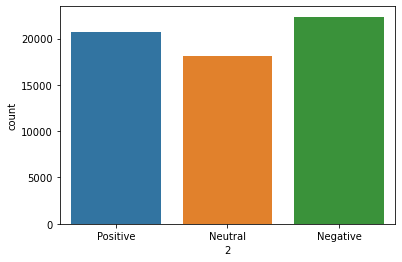

In [35]:
sns.countplot(x=2, data=data_array)

# Cleaning text

In [36]:
for message in data_array[3]:
    message = message.lower()
    message = re.sub('[%s]' % re.escape(string.punctuation), ' ', message)
    message = re.sub('\s{2,}', " ", message)
    stop_words = stopwords.words("english")
    message = ' '.join([word for word in message.split(' ') if word not in stop_words])

# Vizualization

In [37]:
def visualization(label):
    text = ''
    for msg in data_array[data_array[2] == label][3]:
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

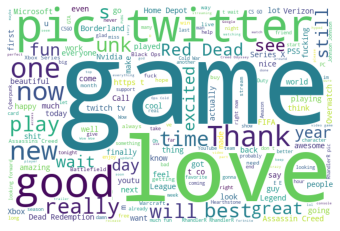

In [38]:
visualization('Positive')

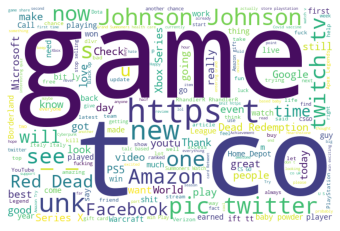

In [39]:
visualization('Neutral')

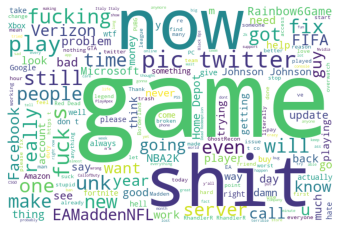

In [40]:
visualization('Negative')

# Vectorization with CountVectorizer

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data_array[3],     
                                                    data_array[2].values, 
                                                    train_size=0.3)

In [42]:
vectorizer = CountVectorizer()
X_train_tr1 = vectorizer.fit_transform(x_train)
X_test_tr1 = vectorizer.transform(x_test)

# Vectorization with TFIDF

In [43]:
vectorizer = TfidfVectorizer()
X_train_tr2 = vectorizer.fit_transform(x_train)
X_test_tr2 = vectorizer.transform(x_test)

# Multinomial Naive Bayes

In [44]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tr1, y_train)
y_pred = clf.predict(X_test_tr1)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.85      0.81     15624
     Neutral       0.82      0.68      0.74     12736
    Positive       0.78      0.80      0.79     14425

    accuracy                           0.79     42785
   macro avg       0.79      0.78      0.78     42785
weighted avg       0.79      0.79      0.78     42785



In [46]:
print(confusion_matrix(y_test, y_pred))

[[13328   939  1357]
 [ 2146  8671  1919]
 [ 1888   949 11588]]


In [47]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tr2, y_train)
y_pred = clf.predict(X_test_tr2)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.76      0.88      0.81     15624
     Neutral       0.85      0.67      0.75     12736
    Positive       0.79      0.80      0.80     14425

    accuracy                           0.79     42785
   macro avg       0.80      0.78      0.79     42785
weighted avg       0.80      0.79      0.79     42785



In [49]:
print(confusion_matrix(y_test, y_pred))

[[13778   683  1163]
 [ 2373  8509  1854]
 [ 2072   762 11591]]


# Random Forest Classifier

In [50]:
for i in range (50,60):
    forest_clf = RandomForestClassifier(n_estimators = i, criterion='entropy')
    forest_clf = forest_clf.fit(X_train_tr1, y_train) 
    y_pred=forest_clf.predict(X_test_tr1)
    print(i, "  trees   =>   accuracy = ", accuracy_score(y_test, y_pred))

50   trees   =>   accuracy =  0.8325581395348837
51   trees   =>   accuracy =  0.8320205679560594
52   trees   =>   accuracy =  0.828023840130887
53   trees   =>   accuracy =  0.8340539908846558
54   trees   =>   accuracy =  0.8335631646605118
55   trees   =>   accuracy =  0.830735070702349
56   trees   =>   accuracy =  0.8326750029215847
57   trees   =>   accuracy =  0.8327918663082856
58   trees   =>   accuracy =  0.8340072455299754
59   trees   =>   accuracy =  0.83332943788711


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85     15624
     Neutral       0.88      0.75      0.81     12736
    Positive       0.83      0.84      0.84     14425

    accuracy                           0.83     42785
   macro avg       0.84      0.83      0.83     42785
weighted avg       0.84      0.83      0.83     42785



In [52]:
print(confusion_matrix(y_test, y_pred))

[[13969   634  1021]
 [ 1801  9512  1423]
 [ 1538   714 12173]]


In [53]:
for i in range (50,60):
    forest_clf = RandomForestClassifier(n_estimators = i, criterion='entropy')
    forest_clf = forest_clf.fit(X_train_tr2, y_train) 
    y_pred=forest_clf.predict(X_test_tr2)
    print(i, "  trees   =>   accuracy = ", accuracy_score(y_test, y_pred))

50   trees   =>   accuracy =  0.8242140937244361
51   trees   =>   accuracy =  0.8223676522145612
52   trees   =>   accuracy =  0.8217833352810564
53   trees   =>   accuracy =  0.8241439756924156
54   trees   =>   accuracy =  0.8251957461727241
55   trees   =>   accuracy =  0.8260371625569709
56   trees   =>   accuracy =  0.8268084609091971
57   trees   =>   accuracy =  0.8267383428771766
58   trees   =>   accuracy =  0.8238868762416734
59   trees   =>   accuracy =  0.8240972303377352


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.80      0.89      0.84     15624
     Neutral       0.86      0.74      0.80     12736
    Positive       0.82      0.83      0.83     14425

    accuracy                           0.82     42785
   macro avg       0.83      0.82      0.82     42785
weighted avg       0.83      0.82      0.82     42785



In [55]:
print(confusion_matrix(y_test, y_pred))

[[13882   659  1083]
 [ 1836  9437  1463]
 [ 1666   819 11940]]


# Logistic Regression

In [56]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tr1, y_train)
y_pred = clf.predict(X_test_tr1)

C:\Users\Yuliia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83     15624
     Neutral       0.81      0.72      0.76     12736
    Positive       0.77      0.83      0.80     14425

    accuracy                           0.80     42785
   macro avg       0.80      0.80      0.80     42785
weighted avg       0.80      0.80      0.80     42785



In [58]:
print(confusion_matrix(y_test, y_pred))

[[13120  1025  1479]
 [ 1577  9156  2003]
 [ 1368  1099 11958]]


In [59]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tr2, y_train)
y_pred = clf.predict(X_test_tr2)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.78      0.83      0.80     15624
     Neutral       0.75      0.68      0.72     12736
    Positive       0.77      0.77      0.77     14425

    accuracy                           0.77     42785
   macro avg       0.77      0.76      0.76     42785
weighted avg       0.77      0.77      0.77     42785



In [61]:
print(confusion_matrix(y_test, y_pred))

[[12968  1298  1358]
 [ 2009  8715  2012]
 [ 1726  1534 11165]]
